In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
#matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
def encrypt(string, shift):
 
  cipher = ''
  for char in string: 
    if char == ' ':
      cipher = cipher + char
    elif  char.isupper():
      cipher = cipher + chr((ord(char) + shift - 65) % 26 + 65)
    else:
      cipher = cipher + chr((ord(char) + shift - 97) % 26 + 97)
  
  return cipher
 
text = input("enter string: ")
s = int(input("enter shift number: "))
print("original string: ", text)
print("after encryption: ", encrypt(text, s))

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

Here one important things to notice is that  "total_sqft" features is of object type. That's mean we have clean this feature .

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
#For the simplicity let's delete the first three features, seems to be less importent
df1 = df.drop(['area_type', 'availability','society'], axis = 1)

In [8]:
# Let's check the missing value
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

Here we are ignorable missing values that's why we can directly drop those rows.

In [9]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
#Now have a look of the features value
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

Here we are seeing Strings 'BHK', 'Bedroom'. I think both of the strings are specifying the bedroom and this feature how many bedroom each building contains. That's why let's split the each value of this feature take only the integer part.

In [11]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-11-eadc3504d97e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [13]:
#Let's drop the 'size' column. 
df2 = df2.drop(['size'], axis = 1)

In [14]:
#Let's check the total_sqft column.
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We are expecting this value as integer or float. But here we are seeing some range  so before dealing with this  let's how many types of values are present in this columns.

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df2[~df2['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,1160 - 1195,2.0,0.0,59.935,2


Here we are seeing some alphanumeric value value also.So now i am going to make a function whicch will take the mean when it see range and ignore the alphanumeric value.

In [17]:
def convert_sqt_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0]) + (float(tokens[1])))/2
    try:
        return float(x)
    except:
        return None
    

In [18]:
convert_sqt_to_num('1000Sq. Meter')

In [19]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqt_to_num)
df3.head()


,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [20]:
df3.loc[30]

location      Yelahanka
total_sqft         2475
bath                  4
balcony               0
price               186
bhk                   4
Name: 30, dtype: object

In [21]:
#Now Let's check the location columns.
df3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [22]:
len(df3['location'].unique())

1265

Here we are seeing 1265 unique value.This is an importent feature also while predicting price.That's why we cann,t drop it rather try to manage it.And if we take dummies then it will create dimensionality curse. So somehow we have to do the dimensionality reduction.So first see how much datapoints each unique value has. So those value has less datapoints we will consider it as a other.

In [23]:
location_stats = df3['location'] = df3['location'].apply(lambda x : x.strip()) #To strip leading and ending extra space of the each location. 
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield                              515
Sarjapur  Road                          372
Electronic City                         302
Kanakpura Road                          261
Thanisandra                             234
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
1 Annasandrapalya                         1
Name: location, Length: 1254, dtype: int64

So here we are seeing many  location contain only  one data points.

In [24]:
len(location_stats[location_stats<= 10])

1017

In [25]:
location_stats_less_then_10 = location_stats[location_stats<= 10]
location_stats_less_then_10

location
Kalkere                                 10
Dairy Circle                            10
1st Block Koramangala                   10
Ganga Nagar                             10
Basapura                                10
                                        ..
Kodanda Reddy Layout                     1
Kirloskar layout, Basaveshwarnagar       1
Kengeri Satellite Town Stage II          1
Kengeri Satellite Town KHB Apartment     1
1 Annasandrapalya                        1
Name: location, Length: 1017, dtype: int64

So here we are seeing that 1017 location which has less the 10 data points. so let's make another category 'other' which contain this types of value.

In [26]:
df3.location = df3.location.apply(lambda x : 'other'  if x in location_stats_less_then_10 else x)
len(df3.location.unique())

238

In [27]:
df3.head(20)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
8,Marathahalli,1310.0,3.0,1.0,63.25,3
10,Whitefield,1800.0,2.0,2.0,70.00,3
11,Whitefield,2785.0,5.0,3.0,295.00,4
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2


Let's do the outlier detection.

In [28]:
x = df3.bhk.sum()
y = df3.total_sqft.sum()

In [29]:
y/x

550.5167695248498

From the above calculation we are seeing that average area needed to be there for per bedroom is around 550 squre foot.

Let's  assume a threesold value of 100 sqft. And row containing less the 100 sqft for per bedroom will be consider as outlier and we are going to drop those those rows. 

In [30]:
df3[df3.total_sqft/df3.bhk < 100].head()

,location,total_sqft,bath,balcony,price,bhk
349,other,11.0,3.0,2.0,74.0,3
770,other,600.0,9.0,3.0,190.0,9
857,Vijayanagar,600.0,4.0,1.0,72.0,8
992,Rajaji Nagar,315.0,4.0,2.0,90.0,4
1020,other,15.0,1.0,0.0,30.0,1


In [31]:
df4 = df3[~(df3.total_sqft/df3.bhk < 100)] # Dropping those rows contains outlier

In [32]:
df4.shape

(12681, 6)

In [33]:
df4['Price_per_sqft'] = df4.price*100000 / df4.total_sqft

<ipython-input-33-a17b6d60e205>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Price_per_sqft'] = df4.price*100000 / df4.total_sqft


In [34]:
df4.head()

,location,total_sqft,bath,balcony,price,bhk,Price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [35]:
df4.Price_per_sqft.describe()

count     12639.000000
mean       6524.934565
std        4285.550521
min         267.829813
25%        4239.329087
50%        5363.984674
75%        7126.229291
max      176470.588235
Name: Price_per_sqft, dtype: float64

Here we are seeing some extream high and low value. And by using the mean and standerd deviation er are going to take only those
value which are only 1 standerd deviation way from the mean of each location.

In [36]:
 def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for key, subdf in df.groupby('location'):
    
            m = np.mean(subdf.Price_per_sqft)
            std = np.std(subdf.Price_per_sqft)
            
            reduced_df = subdf[(subdf.Price_per_sqft > (m-std)) & (subdf.Price_per_sqft <= (m+std))]
            df_out = pd.concat([df_out,reduced_df],ignore_index = True)
            
        return df_out
        
df5 =  remove_pps_outliers(df4)
df5.shape

(10418, 7)

In [37]:
df5.head()

,location,total_sqft,bath,balcony,price,bhk,Price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6,10416.666667
3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
4,1st Block Jayanagar,930.0,4.0,2.0,85.0,7,9139.784946


In [38]:
#Let's remove outlier from the 'bath' column.
df5.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  8.,  1.,  7.,  9., 10., 27., 12., 13.])

In [39]:
df5[df5.bath>10]

,location,total_sqft,bath,balcony,price,bhk,Price_per_sqft
8348,other,8000.0,27.0,0.0,230.0,27,2875.000000
8398,other,990.0,12.0,0.0,120.0,8,12121.212121
9791,other,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

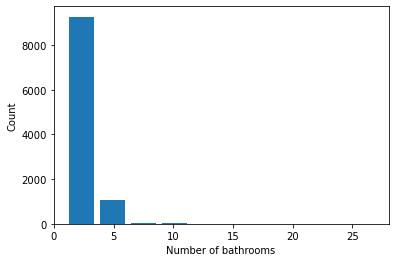

In [40]:
plt.hist(df5.bath,rwidth = .8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [53]:
 df5[df5.bath>df5.bhk + 2]

,location,total_sqft,bath,balcony,price,bhk,Price_per_sqft
1520,Chamrajpet,1500.0,9.0,3.0,230.0,6,15333.333333
1654,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6790,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8398,other,990.0,12.0,0.0,120.0,8,12121.212121
8514,other,11338.0,9.0,1.0,1000.0,6,8819.897689
9805,other,1200.0,9.0,3.0,122.0,6,10166.666667


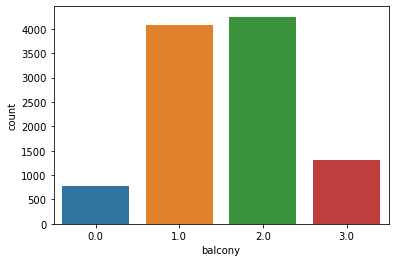

In [54]:
sns.countplot(x = 'balcony', data = df5)

In [63]:
df6 =  df5[df5.balcony>df5.bhk]
df6.head()

,location,total_sqft,bath,balcony,price,bhk,Price_per_sqft
16,1st Phase JP Nagar,840.0,2.0,2.0,50.0,1,5952.380952
53,5th Phase JP Nagar,1150.0,3.0,3.0,52.5,2,4565.217391
66,5th Phase JP Nagar,1220.0,2.0,3.0,88.0,2,7213.114754
86,6th Phase JP Nagar,1180.0,2.0,3.0,80.0,2,6779.661017
97,6th Phase JP Nagar,1192.0,2.0,3.0,75.0,2,6291.946309


In [64]:
df6 =  df5[df5.bath<df5.bhk + 2]
df6.shape

(10326, 7)

In [65]:
dummies = pd.get_dummies(df6.location)

In [66]:
df6 = pd.concat([df6,dummies],axis = 'columns')

In [67]:
df6 = df6.drop(['Price_per_sqft','location'], axis = 1)

In [68]:
X = df6.drop(['price'], axis=1)
y = df6.price

In [69]:
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,2.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,2.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [71]:
X_train.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
9108,1537.0,3.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8169,2072.0,3.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8471,1300.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
833,2370.0,4.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7029,980.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
from sklearn.linear_model import LinearRegression
cls =  LinearRegression()
cls.fit(X_train, y_train)
cls.score(X_test,y_test)

0.7947620363351591